In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
from SimPEG import DC, Maps
import discretize
from scipy.constants import epsilon_0
from pymatsolver import Pardiso

%matplotlib inline

In [2]:
mesh = discretize.CylMesh(
    [[(5, 10), (5, 20, 1.4)], [np.pi*2], [(5, 20, -1.4), (5, 10), (5, 20, 1.4)]], x0= '00C'
)

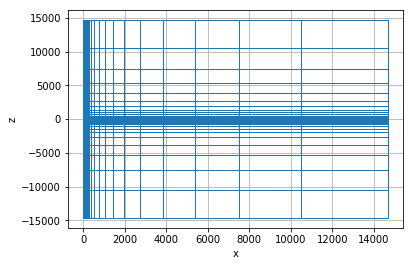

In [3]:
mesh.plotGrid()

In [4]:
sigma0 = 0.1
sigma1 = 1
sigma = sigma0*np.ones(mesh.nC)
sigma[mesh.gridCC[:,2]<0] = sigma1

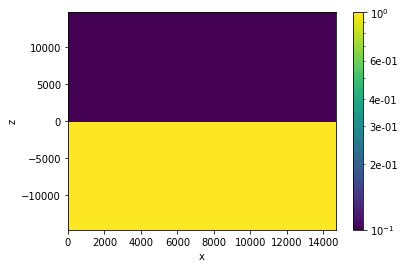

In [5]:
plt.colorbar(mesh.plotImage(sigma, pcolorOpts={"norm":LogNorm()})[0])

In [6]:
src_a = np.r_[2.5, 0., 22.5]
src_b = np.r_[2.5, 0., -22.5]

(-50, 50)

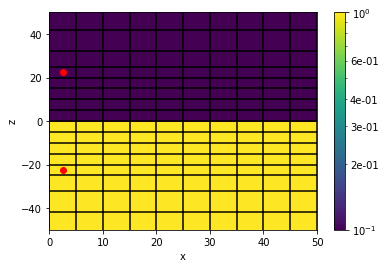

In [7]:
fig, ax = plt.subplots(1,1)
plt.colorbar(
    mesh.plotImage(sigma, pcolorOpts={"norm":LogNorm()}, ax=ax, grid=True)[0], ax=ax
)
ax.plot(src_a[0], src_a[2], 'ro')
ax.plot(src_b[0], src_b[2], 'ro')

ax.set_xlim([0., 50])
ax.set_ylim([-50, 50])

In [8]:
prob = DC.Problem3D_CC(mesh, sigmaMap=Maps.IdentityMap(mesh), bc_type="Dirichlet", Solver=Pardiso)

Homogeneous Dirichlet is the natural BC for this CC discretization.


In [9]:
src = DC.Src.Dipole([], src_a, src_b)
survey = DC.Survey([src])

In [10]:
prob.pair(survey)

In [11]:
fields = prob.fields(sigma)

(-100, 100)

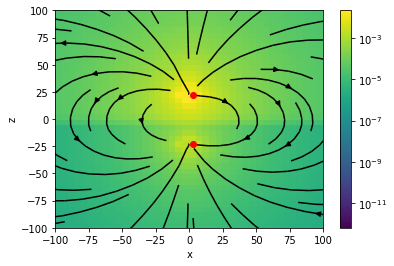

In [12]:
fig, ax = plt.subplots(1,1)
plt.colorbar(
    mesh.plotImage(
        fields[:, 'e'], vType='F', view="vec", pcolorOpts={"norm":LogNorm()}, ax=ax,
        range_x=np.r_[-200, 200], range_y=np.r_[-200, 200], mirror=True
    )[0], ax=ax
)
ax.plot(src_a[0], src_a[2], 'ro')
ax.plot(src_b[0], src_b[2], 'ro')

ax.set_xlim([-100., 100])
ax.set_ylim([-100, 100])

In [13]:
mesh.hx.sum()

14674.444699424823

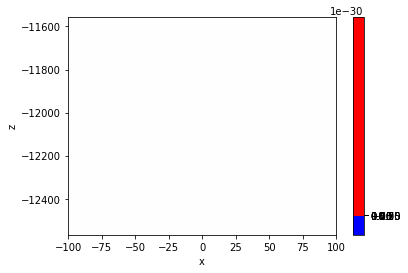

In [14]:
fig, ax = plt.subplots(1,1)
xlim = np.r_[-100, 100]
ylim = np.r_[mesh.vectorCCz.min()-10, mesh.vectorCCz.min()+1000]
cb = plt.colorbar(
    mesh.plotImage(
        fields[:, 'charge_density'], pcolorOpts={"cmap":"bwr"}, ax=ax,
        range_x=xlim, range_y=ylim, sample_grid=np.r_[np.diff(xlim)/100., np.diff(ylim)/100.],
        mirror=True #, grid=True
    )[0], ax=ax
)
# ax.plot(src_a[0], src_a[2], 'ro')
# ax.plot(src_b[0], src_b[2], 'ro')

# ax.set_xlim([-100., 100])
# ax.set_ylim([-100, 100])

cb.set_clim(1e-30 * np.r_[-1, 1])

In [15]:
charge = epsilon_0*(prob.Vol * mesh.faceDiv * fields[:, 'e'])

In [16]:
boundary_cells = (
    (mesh.gridCC[:, 0] == mesh.gridCC[:, 0].max()) |
    (mesh.gridCC[:, 2] == mesh.gridCC[:, 2].min()) |
    (mesh.gridCC[:, 2] == mesh.gridCC[:, 2].max()) 
)

In [17]:
fields[:, 'charge'][boundary_cells].sum()

-1.772556073682058e-14

In [18]:
fields[:, 'charge'].sum()

1.7024125942998157e-13

In [19]:
h = [(5, 10, -1.3), (5, 10), (5, 10, 1.3)]
mesh_cart = discretize.TensorMesh([h, h, h], x0='CCC')

In [20]:
prob2 = DC.Problem3D_CC(mesh_cart, sigmaMap=Maps.IdentityMap(mesh_cart), Solver=Pardiso, bc_type="Dirichlet")

Homogeneous Dirichlet is the natural BC for this CC discretization.


In [21]:
src2 = DC.Src.Dipole([], src_a, src_b)
survey2 = DC.Survey([src2])
prob2.pair(survey2)

In [22]:
sigma2 = sigma0 * np.ones(mesh_cart.nC)
sigma2[mesh_cart.gridCC[:, 2] < 0] = sigma1

(-50, 50)

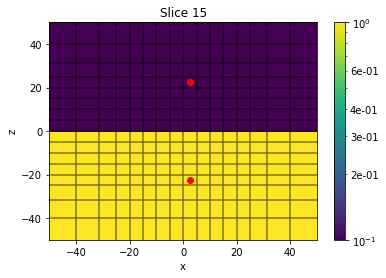

In [23]:
fig, ax = plt.subplots(1,1)
plt.colorbar(mesh_cart.plotSlice(sigma2, pcolorOpts={"norm":LogNorm()}, ax=ax, grid=True, normal="Y")[0], ax=ax)
ax.plot(src_a[0], src_a[2], 'ro')
ax.plot(src_b[0], src_b[2], 'ro')

ax.set_xlim([-50., 50])
ax.set_ylim([-50, 50])

In [24]:
%%time
fields_cart = prob2.fields(sigma2)

CPU times: user 809 ms, sys: 66 ms, total: 875 ms
Wall time: 520 ms


(-100, 100)

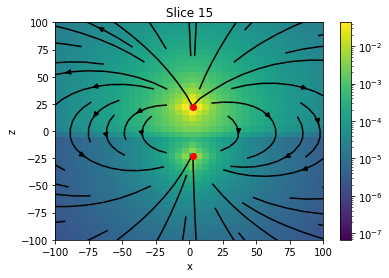

In [25]:
fig, ax = plt.subplots(1,1)
plt.colorbar(
    mesh_cart.plotSlice(
        fields_cart[:, 'e'], vType='F', view="vec", pcolorOpts={"norm":LogNorm()}, ax=ax,
        range_x=np.r_[-200, 200], range_y=np.r_[-200, 200], normal="Y"
    )[0], ax=ax
)
ax.plot(src_a[0], src_a[2], 'ro')
ax.plot(src_b[0], src_b[2], 'ro')

ax.set_xlim([-100., 100])
ax.set_ylim([-100, 100])

In [26]:
mesh_cart.vectorCCx.max()

267.56210937725007

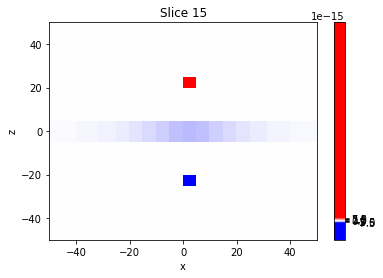

In [27]:
fig, ax = plt.subplots(1,1)
cb = plt.colorbar(
    mesh_cart.plotSlice(
        fields_cart[:, 'charge_density'], pcolorOpts={"cmap":"bwr"}, ax=ax,
        range_x=np.r_[-50, 50], range_y=np.r_[-50, 50], normal="Y"
    )[0], ax=ax
)
# ax.plot(src_a[0], src_a[2], 'ro')
# ax.plot(src_b[0], src_b[2], 'ro')

# ax.set_xlim([-100., 100])
# ax.set_ylim([-100, 100])

cb.set_clim(1e-14 * np.r_[-1, 1])

In [28]:
fields_cart[:, 'charge'].max(), fields_cart[:, 'charge'].min(), fields_cart[:, 'charge'].sum()

(8.85418781762039e-11, -8.854187817620389e-12, 7.7452009190997e-12)

In [29]:
fields_cart[:, "charge"][
    (mesh_cart.gridCC[:, 0] < 50) & (mesh_cart.gridCC[:, 0] > -50) &
    (mesh_cart.gridCC[:, 1] < 50) & (mesh_cart.gridCC[:, 1] > -50) &
    (mesh_cart.gridCC[:, 2] < 10) & (mesh_cart.gridCC[:, 2] > -10)
].sum()

-5.042997201882623e-11

In [30]:
fields_cart[:, "charge"][
    (mesh_cart.gridCC[:, 0] == mesh_cart.vectorCCx.max()) | (mesh_cart.gridCC[:, 0] == mesh_cart.vectorCCx.min()) |
    (mesh_cart.gridCC[:, 1] == mesh_cart.vectorCCy.max()) | (mesh_cart.gridCC[:, 1] == mesh_cart.vectorCCy.min()) |
    (mesh_cart.gridCC[:, 2] == mesh_cart.vectorCCz.max()) | (mesh_cart.gridCC[:, 2] == mesh_cart.vectorCCz.min())
].min()

-4.489403138984084e-15